In [108]:
!pip install tabulate
import numpy as np
from tabulate import tabulate
import pandas as pd
from scipy.interpolate import lagrange
from sklearn.metrics import mean_squared_error

In [109]:

class DecisionNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, label=None, igr=None,ig=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.label = label
        self.igr = igr
        self.ig = ig


def calculate_entropy(y):
  if y.size ==0:
    return 0
  else:
      p1 = np.mean(y)
      if p1 == 0 or p1 == 1:
          return 0
      else:
          return -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)


def get_information_gain_ratio(X, y, feature, threshold):
    y1 = y[X[:, feature] >= threshold]
    left_entropy = calculate_entropy(y1)
    y2 = y[X[:, feature] < threshold]
    right_entropy = calculate_entropy(y2)

    p1 = len(y1) / len(y)

    info_gain = calculate_entropy(y) - p1 * left_entropy - (1 - p1) * right_entropy


    split_entropy = 0 if p1 == 0 or p1 == 1 else -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)

    return -1 if split_entropy == 0 else info_gain / split_entropy


def find_best_split(X, y):
    best_feature = None
    best_threshold = None
    max_ig_ratio = 0
    n = X.shape[1]
    feature = 0
    while feature <n:
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            ig_ratio = get_information_gain_ratio(X, y, feature, threshold)
            if ig_ratio > max_ig_ratio:
                max_ig_ratio = ig_ratio
                best_feature = feature
                best_threshold = threshold
        feature = feature+1
    return max_ig_ratio,best_feature, best_threshold


def data_split(X, y, feature, threshold):

    try:
      condition = X[:, feature] >= threshold
      return X[condition], y[condition], X[~condition], y[~condition]

    except Exception as e:
       print(X,y,feature,threshold)



def tree_build(X, y):
    ig_ratio,feature,threshold = find_best_split(X, y)

    if ig_ratio == 0:
        return DecisionNode(label = y[0],igr=0)
    else:
        X1, y1, X2, y2 = data_split(X, y, feature, threshold)
        right = tree_build(X2, y2)
        left = tree_build(X1, y1)
        return DecisionNode(feature = feature, threshold = threshold, left = left, right = right, label = None,igr=ig_ratio)

def predict(x,tree):
    if tree.left == None and tree.right == None:
      return tree.label

    if x[tree.feature] >= tree.threshold:
        return predict( x,tree.left)

    return predict(x,tree.right)

def read_data(file_path):
    df = pd.read_csv(file_path, delimiter=' ', header=None)
    data = df.to_numpy()
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

def getAccuracy(X,y,tree):
  predictions = []
  accuracy = 0
  for i, x in enumerate(X):
    predicted_val = predict(x,tree)
    if(predicted_val == y[i]):
      accuracy = accuracy+1

    predictions.append(predicted_val)

  return accuracy/len(y)


def main_test(trainfile, testfile):
    X_train, y_train = read_data(trainfile)
    X_test, y_test = read_data(testfile)
    tree = tree_build(X_train, y_train)

    return getAccuracy(X_test,y_test,tree)


def count_nodes(tree):
    if tree.left == None and tree.right == None:
      return 1
    return 1 + count_nodes(tree.left) + count_nodes(tree.right)

def calc_error(tree, X, y):
    error = 1 - getAccuracy(X,y,tree)
    return error



In [110]:
def plot_tree(tree, depth=0):
    indent = "  " * depth

    if tree.left == None and tree.right == None:
        print(f"{indent}Predicted Class: {tree.label}")
    else:
        print(f"{indent}Split on Feature X{tree.feature} >= {tree.threshold}")

        print(f"{indent}--> True:")
        plot_tree(tree.left, depth + 1)

        print(f"{indent}--> False:")
        plot_tree(tree.right, depth + 1)


Question 2.2

   x1  x2  y1
0   0   0   1
1   1   1   1
2   0   1   0
3   1   0   0


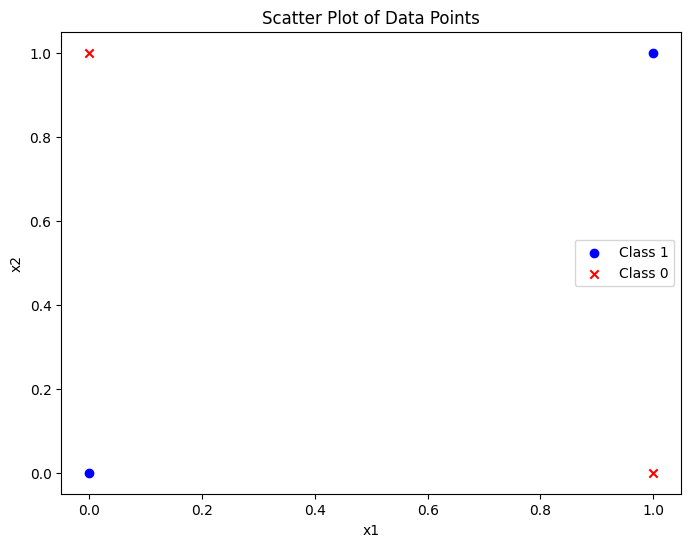

In [111]:
import pandas as pd

data = {
    'x1': [0, 1, 0, 1],
    'x2': [0, 1, 1, 0],
    'y1': [1, 1, 0, 0]
}

df = pd.DataFrame(data)

print(df)


import matplotlib.pyplot as plt

# Separate the features and the target variable
x1 = df['x1']
x2 = df['x2']
y1 = df['y1']

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(x1[y1 == 1], x2[y1 == 1], label='Class 1', c='blue', marker='o')
plt.scatter(x1[y1 == 0], x2[y1 == 0], label='Class 0', c='red', marker='x')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of Data Points')
plt.legend()

# Show the plot
plt.show()



Q 2.3


In [112]:
training_set = "Druns.txt"
X_druns, Y_druns = read_data(training_set)
n = X_druns.shape[1]
feature = 0
table_data = []

while(feature <n):
  thresholds = np.unique(X_druns[:, feature])
  for threshold in thresholds:
      y1 = Y_druns[X_druns[:, feature] >= threshold]
      y2 = Y_druns[X_druns[:, feature] < threshold]
      p1 = len(y1) / len(Y_druns)
      info_gain =  calculate_entropy(Y_druns) - p1 * calculate_entropy(y1) - (1-p1) * calculate_entropy(y2)
      if p1==0 or p1==1:
          information_gain_ratio = np.inf
      else:
          split_entropy = -p1 * np.log2(p1) - (1-p1) * np.log2(1-p1)
          information_gain_ratio = info_gain/split_entropy

      table_data.append([feature, threshold, info_gain, information_gain_ratio])
  feature = feature+1

headers = ["Feature", "Threshold", "Information Gain", "Information Gain Ratio"]

table = tabulate(table_data, headers, tablefmt="grid")

print(table)

+-----------+-------------+--------------------+--------------------------+
|   Feature |   Threshold |   Information Gain |   Information Gain Ratio |
+===========+=============+====================+==========================+
|         0 |         0   |         0          |             inf          |
+-----------+-------------+--------------------+--------------------------+
|         0 |         0.1 |         0.0441774  |               0.100518   |
+-----------+-------------+--------------------+--------------------------+
|         1 |        -2   |         0          |             inf          |
+-----------+-------------+--------------------+--------------------------+
|         1 |        -1   |         0.0441774  |               0.100518   |
+-----------+-------------+--------------------+--------------------------+
|         1 |         0   |         0.0382745  |               0.0559538  |
+-----------+-------------+--------------------+--------------------------+
|         1 

Q2.4


In [113]:
X_D3leaves, y_D3leaves = read_data("D3leaves.txt")
tree_D3 = tree_build(X_D3leaves, y_D3leaves)
plot_tree(tree_D3)

Split on Feature X0 >= 10
--> True:
  Predicted Class: 1
--> False:
  Split on Feature X1 >= 3
  --> True:
    Predicted Class: 1
  --> False:
    Predicted Class: 0


Q2.5


In [114]:
X_D1, y_D1 = read_data("D1.txt")
tree_D1 = tree_build(X_D1, y_D1)
plot_tree(tree_D1 )


Split on Feature X1 >= 0.201829
--> True:
  Predicted Class: 1.0
--> False:
  Predicted Class: 0.0


In [115]:
X_D2, y_D2 = read_data("D2.txt")
tree_D2 = tree_build(X_D2, y_D2)
plot_tree(tree_D2 )

Split on Feature X0 >= 0.533076
--> True:
  Split on Feature X1 >= 0.228007
  --> True:
    Split on Feature X1 >= 0.424906
    --> True:
      Predicted Class: 1.0
    --> False:
      Split on Feature X0 >= 0.708127
      --> True:
        Predicted Class: 1.0
      --> False:
        Split on Feature X1 >= 0.32625
        --> True:
          Split on Feature X0 >= 0.595471
          --> True:
            Split on Feature X0 >= 0.646007
            --> True:
              Predicted Class: 1.0
            --> False:
              Split on Feature X1 >= 0.403494
              --> True:
                Predicted Class: 1.0
              --> False:
                Predicted Class: 0.0
          --> False:
            Predicted Class: 0.0
        --> False:
          Predicted Class: 0.0
  --> False:
    Split on Feature X0 >= 0.887224
    --> True:
      Split on Feature X1 >= 0.037708
      --> True:
        Split on Feature X1 >= 0.082895
        --> True:
          Predicted Class: 1.

Q2.6

In [116]:
def plot_scatter(x1,x2,y):


  # Define colors for different classes
  colors = ['r' if cls == 1 else 'b' for cls in y]

  # Create a 2D scatter plot with different colors for each class
  plt.scatter(x1, x2, c=colors, marker='o', label='Class 1 (red), Class 0 (blue)')

  # Add labels and a title
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.title("Scatter Plot")

  # Add a legend
  red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Class 1', markerfacecolor='r', markersize=8)
  blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Class 0', markerfacecolor='b', markersize=8)
  plt.legend(handles=[red_patch, blue_patch])

  # Show the plot
  plt.show()

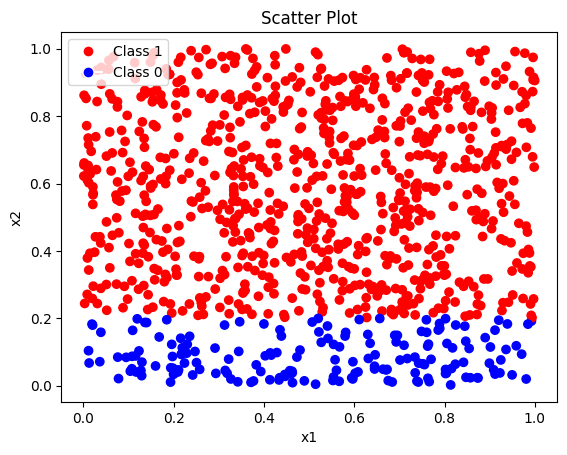

In [117]:


# Read data from the space-separated text file
data = np.loadtxt('D1.txt', skiprows=1)  # skip the header row
x1 = data[:, 0]
x2 = data[:, 1]
y = data[:, 2]
plot_scatter(x1,x2,y)

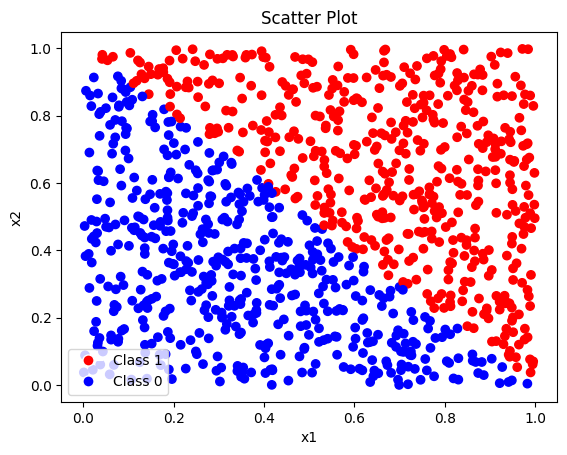

In [118]:


# Read data from the space-separated text file
data = np.loadtxt('D2.txt', skiprows=1)  # skip the header row
x1 = data[:, 0]
x2 = data[:, 1]
y = data[:, 2]
plot_scatter(x1,x2,y)


Q2.7

In [119]:
def load_and_split_data(file_path, train_size=8192):
    # Load data from the specified file
    X, y = read_data(file_path)

    # Perform random permutation on the indices
    permuted_indices = np.random.permutation(len(X))

    # Split the data into training and test sets
    X_train = X[permuted_indices[:train_size]]
    y_train = y[permuted_indices[:train_size]]

    X_test = X[permuted_indices[train_size:]]
    y_test = y[permuted_indices[train_size:]]

    return X_train, y_train, X_test, y_test

# Usage
X_Dbig_train, y_Dbig_train, X_Dbig_test, y_Dbig_test = load_and_split_data("Dbig.txt")


In [120]:

nested_sequence_n = [32, 128, 512, 2048, 8192]
nested_sets = []
i=0
while(i<5):
    n = nested_sequence_n[i]
    nested_sets.append([X_Dbig_train[:n], y_Dbig_train[:n]])
    i = i+1


For Tree D 32 , number of nodes in the tree: 9  and test set error for the tree: 0.11283185840707965


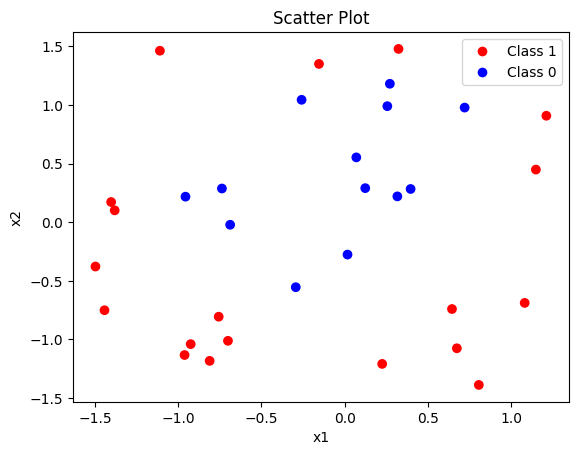

For Tree D 128 , number of nodes in the tree: 29  and test set error for the tree: 0.09015486725663713


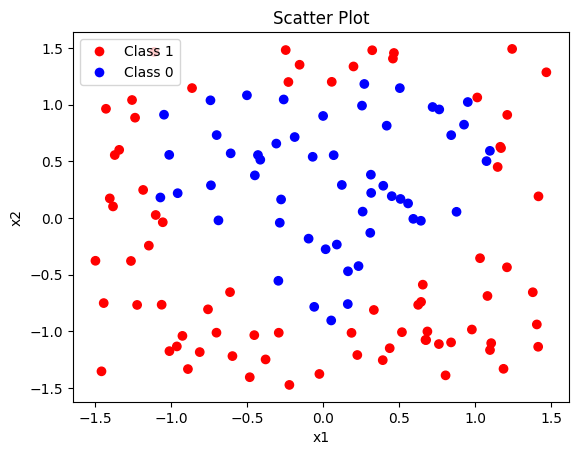

For Tree D 512 , number of nodes in the tree: 49  and test set error for the tree: 0.04811946902654862


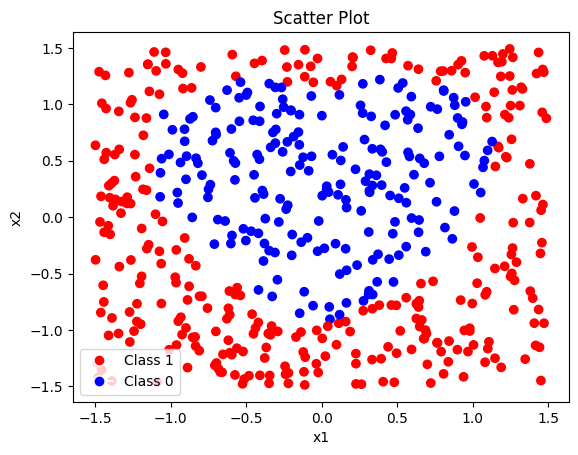

For Tree D 2048 , number of nodes in the tree: 137  and test set error for the tree: 0.028207964601769886


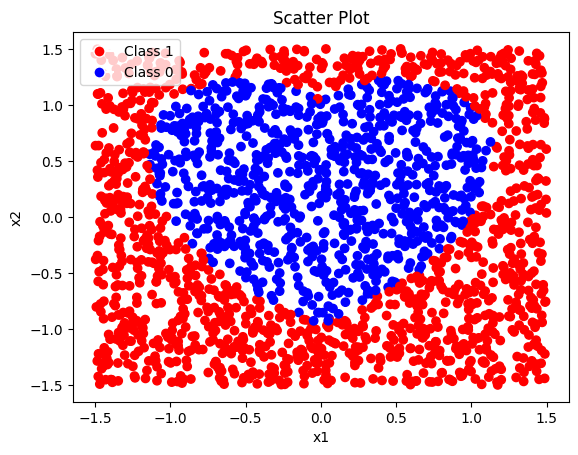

For Tree D 8192 , number of nodes in the tree: 257  and test set error for the tree: 0.014380530973451378


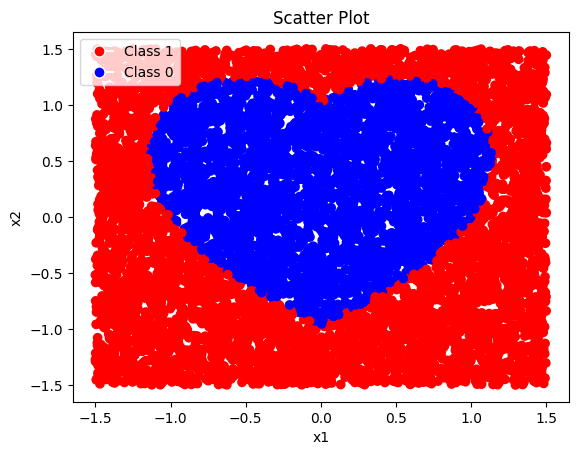

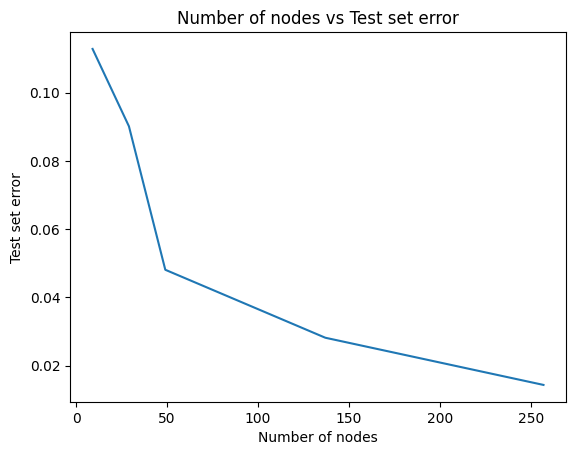

In [121]:
nodes_count_list = []
test_error_list = []
for Dn in nested_sets:
    tree_p7 =tree_build(Dn[0], Dn[1])
    nodes_count_list.append(count_nodes(tree_p7))
    test_error_list.append(calc_error(tree_p7, X_Dbig_test, y_Dbig_test))
    print("For Tree D", len(Dn[0]), ", number of nodes in the tree:", nodes_count_list[-1], " and test set error for the tree:", test_error_list[-1])
    plot_scatter(Dn[0][:,0], Dn[0][:,1],Dn[1])


##plotting the number of nodes vs test error
plt.plot(nodes_count_list, test_error_list)
plt.xlabel("Number of nodes")
plt.ylabel("Test set error")
plt.title("Number of nodes vs Test set error")
plt.show()

Training size: 32, Number of Nodes: 9, Test Set Error: 0.08296460176991151
Training size: 128, Number of Nodes: 31, Test Set Error: 0.10674778761061947
Training size: 512, Number of Nodes: 55, Test Set Error: 0.04756637168141593
Training size: 2048, Number of Nodes: 121, Test Set Error: 0.02765486725663717
Training size: 8192, Number of Nodes: 245, Test Set Error: 0.012721238938053098


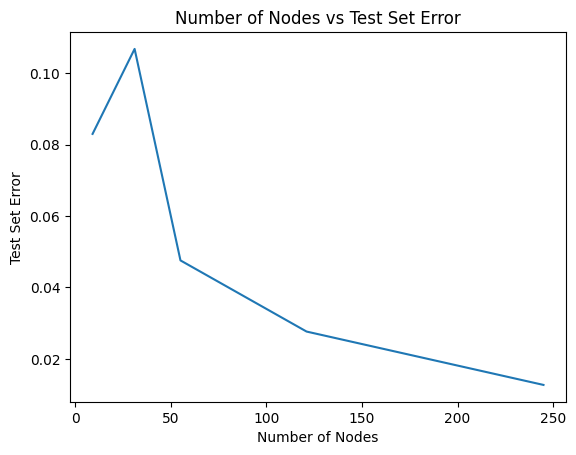

In [122]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store results
num_nodes_total = []
errors = []

# Different values of training size
training_sizes = [32, 128, 512, 2048, 8192]

# Initialize index variable
i = 0

# Loop until all training sizes are processed
while i < len(training_sizes):
    # Extract a subset of training data
    val = training_sizes[i]
    X_train_subset = X_Dbig_train[:val]
    y_train_subset = y_Dbig_train[:val]

    # Instantiate the DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(X_train_subset, y_train_subset)

    # Record the number of nodes in the tree
    num_nodes_total.append(tree.tree_.node_count)

    # Use the model to make predictions on the test set
    y_pred = tree.predict(X_Dbig_test)

    # Calculate the test set error
    error = np.mean(y_pred != y_Dbig_test)
    errors.append(error)

    # Print results
    print(f"Training size: {val}, Number of Nodes: {tree.tree_.node_count}, Test Set Error: {error}")

    # Move to the next training size
    i += 1

# Plotting the number of nodes vs test error
plt.plot(num_nodes_total, errors)
plt.xlabel("Number of Nodes")
plt.ylabel("Test Set Error")
plt.title("Number of Nodes vs Test Set Error")
plt.show()


Q4

train error with noise(sd = 0 ): 326.30903973227663
test error with noise(sd = 0 ): 329.19395566364375
train error with noise(sd = 10 ): 362.69723642465567
test error with noise(sd = 10 ): 341.9280767236638
train error with noise(sd = 100 ): 250.91373116365506
test error with noise(sd = 100 ): 107.9808503816901
train error with noise(sd = 250 ): 279.59005204042774
test error with noise(sd = 250 ): 40.79513693884503
train error with noise(sd = 500 ): 289.17410837090296
test error with noise(sd = 500 ): 30.538256779632714
train error with noise(sd = 1000 ): 276.9374324178866
test error with noise(sd = 1000 ): 6.924965121380973


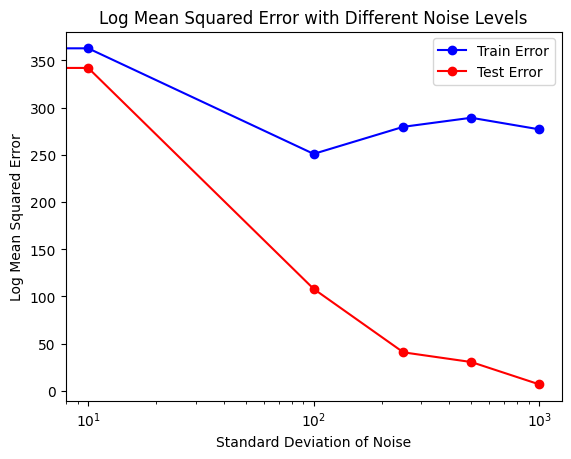

In [123]:
# Set the interval [a, b]
a, b = 0, 100

# Number of points
n = 100

# Generate training and test sets
X_r_train = np.random.uniform(a, b, n)
y_r_train = np.sin(X_r_train)

X_r_test = np.random.uniform(a, b, n)
y_r_test = np.sin(X_r_test)

# Arrays to store log mean squared errors
log_train_errors = []
log_test_errors = []

#when the stand_dev = 0 then it is non noise data.
stand_devs = [0,10,100,250,500,1000]
for stand_dev in stand_devs:
    X_r_train_noise = X_r_train + np.random.normal(0, stand_dev, 100)
    y_r_train_noise = np.sin(X_r_train_noise)
    f = lagrange(X_r_train_noise,y_r_train_noise)
    y_r_train_pred_noise = f(X_r_train_noise)
    log_train_error_noise = np.log(mean_squared_error(y_r_train_pred_noise, y_r_train_noise))
    print("train error with noise(sd =",stand_dev, "):", log_train_error_noise)

    log_train_errors.append(log_train_error_noise)


    y_r_test_pred_noise = f(X_r_test)
    log_test_error_noise = np.log(mean_squared_error(y_r_test_pred_noise, y_r_test))
    print("test error with noise(sd =",stand_dev, "):", log_test_error_noise)
    log_test_errors.append(log_test_error_noise)

    # # Plot log mean squared error
    # plt.plot(stand_dev, log_train_error_noise, 'bo', label=f'Train SD={stand_dev}')
    # plt.plot(stand_dev, log_test_error_noise, 'ro', label=f'Test SD={stand_dev}')

# Plot the line curve
plt.plot(stand_devs, log_train_errors, 'bo-', label='Train Error')
plt.plot(stand_devs, log_test_errors, 'ro-', label='Test Error')

plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.xlabel('Standard Deviation of Noise')
plt.ylabel('Log Mean Squared Error')
plt.title('Log Mean Squared Error with Different Noise Levels')
plt.legend()
plt.show()